# Анализ перспективного тарифа оператора сотовой связи

## Описание проекта

***
**Заказчик** - коммерческий департамент федерального оператора сотовой связи "Мегалайн".

**Входные данные** - небольшая выборка клиентов (500 пользователей): кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

**Результаты исследования** - необходимо провести статический анализ данных поведения клиентов и сформировать вывод - какой из представленных тарифных планов `«Смарт»` и `«Ультра»`. По сформированному выводы коммерческий департамент выполнит корректировку рекламного бюджета.
***
**Описание тарифов**

*Тариф «Смарт»*
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
  - Минута разговора — 3 рубля. Количество использованных минут и мегабайтов «Мегалайн» всегда округляет вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
  - Сообщение — 3 рубля.
  - 1 Гб интернет-трафика — 200 рублей.

*Тариф «Ультра»*
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
  - Минута разговора — 1 рубль;
  - Сообщение — 1 рубль;
  - 1 Гб интернет-трафика: 150 рублей.
***
**Последовательность действий**
- Шаг 1. Изучение общей информации о данных из файла
- Шаг 2. Подготовка данных:
  - Привести столбцы датасетов к нужным типам.
  - Исправить ошибки в данных.
  - Добавить новые столбцы в датасет.
  - Посчитать количество:
    - сделанных звонков разговора для каждого пользователя по месяцам;
    - израсходованных минут разговора для каждого пользователя по месяцам;
    - отправленных сообщений по месяцам для каждого пользователя;
    - потраченных мегабайт по месяцам для каждого пользователя.
- Шаг 3. Анализ данных:
  - Исследовательский анализ данных и подсчёт помесячной выручки уже есть в проекте.
  
    Помесячная выручка вычисляется так:
    - отнимите бесплатный лимит от суммарного количества звонков, сообщений и интернет-трафика;
    - остаток умножьте на значение из тарифного плана;
    - к результату прибавьте абонентскую плату, соответствующую тарифному плану/
    
    Запустите ячейки этого шага, изучите код и результат. Какие выводы можно сделать из результатов этого этапа?
- Шаг 4. Проверка гипотез:
  - средняя выручка с пользователей тарифов `«Ультра»` и `«Смарт»` различается;
  - средняя выручка с пользователей из Москвы отличается от выручки с пользователей других регионов/
- Шаг 5. Общий вывод.
***
**Описание данных**
  - Таблица `users` — информация о пользователях:
    - `user_id` — уникальный идентификатор пользователя;
    - `first_name` — имя пользователя;
    - `last_name` — фамилия пользователя;
    - `age` — возраст пользователя (годы);
    - `reg_date` — дата подключения тарифа (день, месяц, год);
    - `churn_date` — дата прекращения пользования тарифом (если значение пропущено, значит, тариф ещё действовал на момент выгрузки данных);
    - `city` — город проживания пользователя;
    - `tarif` — название тарифного плана.
  - Таблица `calls` — информация о звонках:
    - `id` — уникальный номер звонка;
    - `call_date` — дата звонка;
    - `duration` — длительность звонка в минутах;
    - `user_id` — идентификатор пользователя, сделавшего звонок.
  - Таблица `messages` — информация о сообщениях:
    - `id` — уникальный номер звонка;
    - `message_date` — дата сообщения;
    - `user_id` — идентификатор пользователя, отправившего сообщение.
  - Таблица `internet` — информация об интернет-сессиях:
    - `id` — уникальный номер сессии;
    - `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах);
    - `session_date` — дата интернет-сессии;
    - `user_id` — идентификатор пользователя.
  - Таблица `tariffs` — информация о тарифах:
    - `tariff_name` — название тарифа;
    - `rub_monthly_fee` — ежемесячная абонентская плата в рублях;
    - `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату;
    - `messages_included` — количество сообщений в месяц, включённых в абонентскую плату;
    - `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
    - `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
    - `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета;
    - `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).

In [1]:
# импортируем необходимые библиотеки для работы
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

pd.options.display.float_format ='{:.1f}'.format
pd.set_option('display.max_columns', None)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Шаг 1. Изучение общей информации о данных из файла

Необходимо изучить данные полученные от Заказчика на корректность и полноту данных.

In [2]:
# сформируем список датасетов, предоставленных Заказчиком
datasets_yap = [
    '/datasets/calls.csv',
    '/datasets/internet.csv',
    '/datasets/messages.csv',
    '/datasets/tariffs.csv',
    '/datasets/users.csv'
]

In [3]:
# сформируем список датасетов, предоставленных Заказчиком
datasets_local = [
    '/content/drive/MyDrive/datasets_YaP/calls.csv',
    '/content/drive/MyDrive/datasets_YaP/internet.csv',
    '/content/drive/MyDrive/datasets_YaP/messages.csv',
    '/content/drive/MyDrive/datasets_YaP/tariffs.csv',
    '/content/drive/MyDrive/datasets_YaP/users.csv'
]

In [4]:
# сформируем список наименования датасетов
data_names = [
    'calls',
    'sessions',
    'messages',
    'tariffs',
    'users'
]

In [5]:
# прочитаем полученные датасеты
for i in range(len(data_names)):
  try:
    globals()[data_names[i]] = pd.read_csv(datasets_yap[i])
  except:
    globals()[data_names[i]] = pd.read_csv(datasets_local[i])

In [6]:
# выведим первые пять строк датасетов и информацию о них
data_dict = {'calls': calls, 'sessions': sessions, 'messages': messages, 'tariffs': tariffs, 'users': users}

for ds_name, ds in data_dict.items():
  print('\n============', ds_name, '============\n')
  display(ds.head(5))
  print('\nInformation -', ds_name, '\n')
  print(ds.info())


============ calls ============



,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,2.9,1000
3,1000_3,2018-09-21,13.8,1000
4,1000_4,2018-12-15,5.2,1000



Information - calls 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

============ sessions ============



,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113.0,2018-11-25,1000
1,1,1000_1,1052.8,2018-09-07,1000
2,2,1000_2,1197.3,2018-06-25,1000
3,3,1000_3,550.3,2018-08-22,1000
4,4,1000_4,302.6,2018-09-24,1000



Information - sessions 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None

============ messages ============



,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



Information - messages 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None

============ tariffs ============



,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



Information - tariffs 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None

============ users ============



,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



Information - users 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


С помощью метода `hist()` выведим гистограмму для столбца с продолжительностью звонков из датасете `calls`. Посмотрим как распределены данные.

<Axes: >

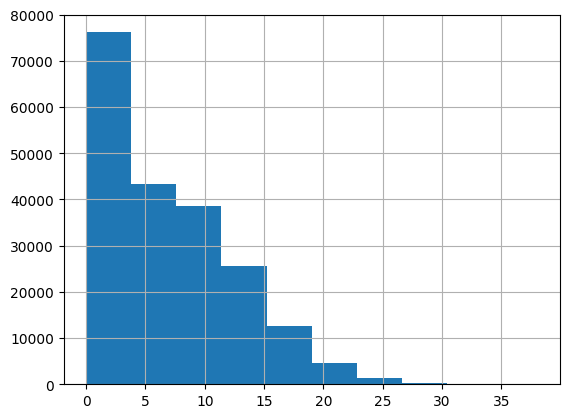

In [7]:
calls['duration'].hist()

Пик данных наблюдается от 0 до 4. Гистограмма спадает вправо, значит диапазон 0-4 является минимальным и меньше него значений быть не может.

С помощью метода `hist()` выведите гистограмму для столбца с количеством потраченных мегабайт из датасета `sessions`.

<Axes: >

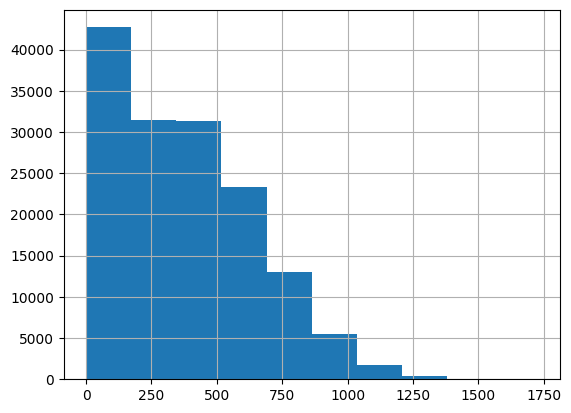

In [8]:
sessions['mb_used'].hist()

**Итог:**

Нами были изучены полученные данные от Заказчика. По полученным данным мы наблюдаем, что все значения в датасетах заполнены, однако, в таблице `users` имеется колонка `churn_date` (дата прекращения пользования тарифом), в которой очень мало значений.

Данная колонка может быть пустой, если тариф ещё действовал на момент выгрузки данных, следовательно можно сделать вывод, что это не является ошибкой и данные пропуски обрабатывать не требуется.

Также можно заметить, что во всех датасетах имеются колонки с датами, которые на данный момент представленны в неправильном типе. Данные колонки требуется привести к правильному типу datetime.

## Шаг 2. Подготовка данных

### Исправление типов данных в колонках

При изучении датасетов было обнаружено, что в данных имеются колонки с датами, которые представлены в неверном типе. По этому предлагаю следующие колонки к типу `datetime` посредством метода `to_datetime()`:

- `reg_date` из таблицы `users`
- `churn_date` из таблицы `users`
- `call_date` из таблицы `calls`
- `message_date` из таблицы `messages`
- `session_date` из таблицы `sessions`

Также в датасете `calls` есть данные о звонках с нулевой продолжительностью. Данные нулевые значения не является ошибкой, таким образом обозначены пропущенные звонки, следовательно, удалять не требуется. Но в данном датасете в колонке `duration` наблюдаются дробные значения, следовательно, необходимо для корректного анализа необходимо значения округлить с помощью метода `numpy.ceil()` и приведем к целочисленному типу.

In [9]:
# приведем значения колонок с датами к типу 'datetime'
users['reg_date'] = pd.to_datetime(users['reg_date'])# обработка столбца reg_date
users['churn_date'] = pd.to_datetime(users['churn_date'])# обработка столбца churn_date

calls['call_date'] = pd.to_datetime(calls['call_date'])# обработка столбца call_date

messages['message_date'] = pd.to_datetime(messages['message_date'])# обработка столбца message_date
sessions['session_date'] = pd.to_datetime(sessions['session_date'])# обработка столбца session_date

In [10]:
# округляем значения столбца duration с помощью np.ceil() и приводим тип к 'int'
calls['duration'] = np.ceil(calls['duration']).astype(int)

### Исправление ошибок в данных

В датасете `sessions` имеется колонка `Unnamed: 0`. Данная колонка возникает, когда данные сохраняются с указанием индекса (`df.to_csv(..., index=column)`). На данный момент нам не требуется данная колонка, по этому предлагаю удалить ее из датасета.

In [11]:
sessions = sessions.drop(['Unnamed: 0'], axis=1)

### Добавление новых столбцов в датасеты

Для последующей подготовки данных и корректного анализа данных нам необходимо добавить новые колонки с наименованием `month` в ряд датасетов:
 - в датасете `сalls` с номером месяца из колонки `call_date`;
 - в датасете `messages` с номером месяца из колонки `message_date`;
 - в датасете `sessions` с номером месяца из колонки `session_date`.

In [12]:
# добавим колонку 'month' в датасете 'calls'
calls['month'] = calls['call_date'].dt.month

In [13]:
# проверим выполненное добавление колонки
calls.head(5)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [14]:
# добавим колонку 'month' в датасете 'messages'
messages['month'] = messages['message_date'].dt.month

In [15]:
# проверим выполненное добавление колонки
messages.head(5)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [16]:
# добавим колонку 'month' в датасете 'sessions'
sessions['month'] = sessions['session_date'].dt.month

In [17]:
# проверим выполненное добавление колонки
sessions.head(5)

,id,mb_used,session_date,user_id,month
0,1000_0,113.0,2018-11-25,1000,11
1,1000_1,1052.8,2018-09-07,1000,9
2,1000_2,1197.3,2018-06-25,1000,6
3,1000_3,550.3,2018-08-22,1000,8
4,1000_4,302.6,2018-09-24,1000,9


### Формирование дополнительных данных

Для последующего корректного анализа тарифов оператора сотовой связи "Мегалайн" нам необходимо посчитать количество:
  - сделанных звонков разговора для каждого пользователя по месяцам;
  - израсходованных минут разговора для каждого пользователя по месяцам;
  - отправленных сообщений по месяцам для каждого пользователя;
  - потраченных мегабайт по месяцам для каждого пользователя.

Посчитаем количество сделанных звонков разговора для каждого пользователя по месяцам и сохраните в переменную `calls_per_month`.

In [18]:
# подсчёт количества звонков для каждого пользователя по месяцам
calls_per_month = calls.groupby(['user_id','month'])\
.agg(calls=('duration', 'count'))

In [19]:
# выведим 30 первых строк на экран
calls_per_month.head(30)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108
        11       115
        12       108
1004    5          9
        6         31
        7         22
        8         19
        9         26
        10        29
        11        19
        12        21

Посчитаем количество израсходованных минут разговора для каждого пользователя по месяцам и сохраните в переменную `minutes_per_month`.

In [20]:
# подсчёт израсходованных минут для каждого пользователя по месяцам
minutes_per_month = calls.groupby(['user_id','month'])\
.agg(minutes=('duration', 'sum'))

In [21]:
# выведим первые 30 строк на экран
minutes_per_month.head(30)

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212
        11         243
        12         236
1003    8          380
        9          961
        10         855
        11         824
        12         802
1004    5           35
        6          171
        7          135
        8          137
        9          117
        10         145
        11         117
        12         130

Посчитаем количество отправленных сообщений по месяцам для каждого пользователя и сохраните в переменную `messages_per_month`.

In [22]:
# подсчёт количества отправленных сообщений для каждого пользователя по месяцам
messages_per_month = messages.groupby(['user_id','month'])\
.agg(messages=('message_date', 'count'))

In [23]:
# выведим первые 30 строк на экран
messages_per_month.head(30)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75
1004    5            95
        6           134
        7           181
        8           151
        9           146
        10          165
        11          158
        12          162
1005    1             7
        2            38

Посчитаем количество потраченных мегабайт по месяцам для каждого пользователя и сохраните в переменную `sessions_per_month`.

In [24]:
# подсчёт потраченных мегабайт для каждого пользователя по месяцам
sessions_per_month = sessions.groupby(['user_id','month'])\
.agg({'mb_used':'sum'})

In [25]:
# выведим первые 30 строк на экран
sessions_per_month.head(30)

mb_used
user_id month         
1000    5       2253.5
        6      23233.8
        7      14003.6
        8      14055.9
        9      14568.9
        10     14702.5
        11     14756.5
        12      9817.6
1001    11     18429.3
        12     14036.7
1002    6      10856.8
        7      17580.1
        8      20319.3
        9      16691.1
        10     13888.2
        11     18587.3
        12     18113.7
1003    8       8565.2
        9      12468.9
        10     14768.1
        11     11356.9
        12     10121.5
1004    5      13404.0
        6      17600.0
        7      22229.6
        8      28584.4
        9      15109.0
        10     18475.4
        11     15616.0
        12     18021.0

**Итог:**

На данном шаге мы подготовили данные для последующего анализа:
- В датасетах `users`, `calls`, `messages`, `sessions` привели данные к правильным типам;
- В датасете `sessions` удалили колонку `Unnamed: 0`;
- В датасетах `calls`, `messages`, `sessions` добавили колонку `month` с номером месяца;
- Подготовители дополнительные данные, а именно посчитали количество:
  - сделанных звонков разговора для каждого пользователя по месяцам - датасет `calls_per_month`;
  - израсходованных минут разговора для каждого пользователя по месяцам - датасет `minutes_per_month`;
  - отправленных сообщений по месяцам для каждого пользователя - `messages_per_month`;
  - потраченных мегабайт по месяцам для каждого пользователя - `sessions_per_month`.

## Шаг 3. Анализ данных

Исследовательский анализ данных и подсчёт помесячной выручки вычислим по следующим шагам:
- отнимем бесплатный лимит от суммарного количества звонков, сообщений и интернет-трафика;
- остаток умножим на значение из тарифного плана;
- к результату прибавим абонентскую плату, соответствующую тарифному плану.

Для начала рассмотрим сколько клиентов, предаставленных в датасете `users`, рассторгли договор с оператором сотовой связи.

In [26]:
print('Кол-во клиентов, рассторгнувших договорв равно',
      users['churn_date'].count() / users['churn_date'].shape[0] * 100, '%')

Кол-во клиентов, рассторгнувших договорв равно 7.6 %


Объединяем все посчитанные значения на `Шаге 2. Подготовка данных` в один датасет `user_behavior`.

Для каждой пары «пользователь — месяц» нам будут доступны информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах.

In [27]:
# соединим датасеты 'messages_per_month', 'sessions_per_month', 'minutes_per_month'
# 'users' методом merge
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')

In [28]:
# выведим первые пять строк вновь созданного датасета
user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.5,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.8,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.6,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.9,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.9,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Проверим пропуски в таблице `user_behavior` после объединения.

In [29]:
# посчитаем кол-во пропусков в датасете 'user_behavior'
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

В датасете `user_behavior` наблюдаем пропуски в пяти колонках:
- `churn_date` - 3027;
- `messages` - 497;
- `minutes` - 40;
- `calls` - 40;
- `mb_used` - 11.

Колонка `churn_date` хранит в себе дату о рассторжении договора клиента с оператором, по этому данные пропуски имеют место быть и заполнять их необязательно. Остальные колонки обработаем, заполнив образовавшиеся пропуски в данных:

In [30]:
# заполним пропуски в колонках, кроме колонки 'churn_date'
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

Присоединяем информацию о тарифах

In [31]:
# переименуем столбец tariff_name на более простое tariff

tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

In [32]:
# присоединим информацию о тарифах к датасету 'user_behavior'
user_behavior = user_behavior.merge(tariffs, on='tariff')

Посчитаем количество минут разговора, сообщений и мегабайт, превышающих включённые в тариф и сохраним в новые колонки датасета:
- `paid_minutes` - кол-во минут;
- `paid_messages` - кол-во сообщений;
- `paid_mb` - кол-во мегабайт.


In [33]:
# посчитаем необходимые кол-ва и сохраним в новые колонки датасета
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

In [34]:
# для отрицательных значений в новых колонках сделаем замену на '0'
for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

Далее переведем превышающие тариф мегабайты в гигабайты и сохраняем в столбец `paid_gb`

In [35]:
# сделаем преобразование и создадим колонку 'paid_mb'
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

Посчитаем выручку за минуты разговора, сообщения и интернет, далее сохраним данные в новые колонки:
- `cost_minutes` - выручка за минуты разговора;
- `cost_messages` - выручка за сообщения;
- `cost_gb` - выручка за интернет (Гб).

In [36]:
# посчитаем выручку и сохраним в новые колонки датасета
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

Посчитаем помесячную выручку с каждого пользователя, она будет храниться в новой колонке `total_cost`

In [37]:
# считаем помесячную выручку и сохраняем в колонку 'total_cost'
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

Создадим датасет `stats_df` для каждой пары «месяц — тариф», в которой будем хранить основные характеристики.

In [38]:
# сохранение статистических метрик для каждой пары месяц-тариф посредством сводной таблицы
stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

In [39]:
# переименуем колонки во вновь созданном датасете stats_df
stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std',
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

In [40]:
# выведим первые 10 строк stats_df
stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.7,8513.7,18.2,203.8,20.8,6444.7,16.2,154.2,20.5,7096.2,15.0,162.5
1,1,ultra,59.4,13140.7,33.8,428.1,41.6,6865.4,30.7,269.8,51.0,14791.4,32.0,382.0
2,2,smart,40.2,11597.0,24.1,298.7,25.4,6247.4,21.8,190.8,38.5,12553.7,20.0,258.0
3,2,ultra,41.5,11775.9,22.0,297.1,41.0,10644.6,26.8,296.5,25.0,7327.1,5.5,168.0
4,3,smart,54.3,15104.2,31.9,390.1,25.5,5828.2,26.8,191.9,59.0,15670.2,23.0,409.0
5,3,ultra,67.7,17535.5,32.3,489.6,44.8,10951.8,41.6,333.7,57.0,17495.2,20.0,403.0
6,4,smart,51.3,13462.2,30.7,367.1,25.7,5698.2,24.5,186.5,52.0,14087.6,28.0,368.5
7,4,ultra,64.1,16828.1,31.6,458.0,36.3,9718.6,37.5,267.7,61.0,16645.8,17.0,453.0
8,5,smart,55.2,15805.2,33.8,387.4,25.4,5978.2,27.0,186.6,59.0,16323.9,30.0,433.0
9,5,ultra,72.5,19363.2,37.9,510.3,41.1,10046.1,40.3,289.6,75.0,18696.4,25.0,519.0


Построим график распределения среднего количества звонков (`ось Y`) по видам тарифов и месяцам(`ось Х`).

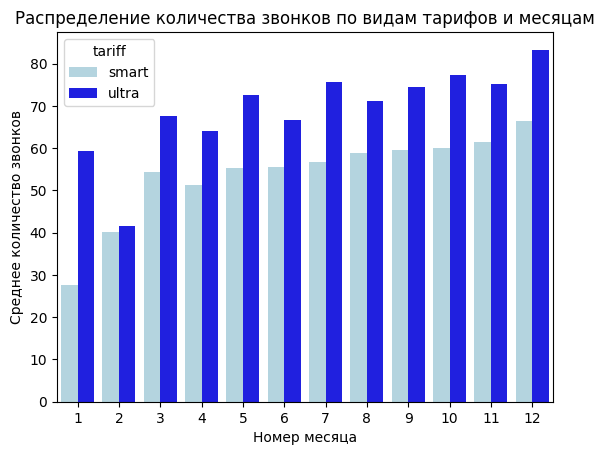

In [41]:
# строим график
ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение количества звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков');

Наибольшее количество звонков наблюдается в декабре, это может быть обусловлено предстоящим праздником Новый Год - оформление заказов на подарки, поздравления, заказ праздничных банкетов и так далее.

Также наблюдается, что тарифом `ultra` пользуются больше чем `smart`.

Посмотрим на соотношение количество звонков и количество клиентов.

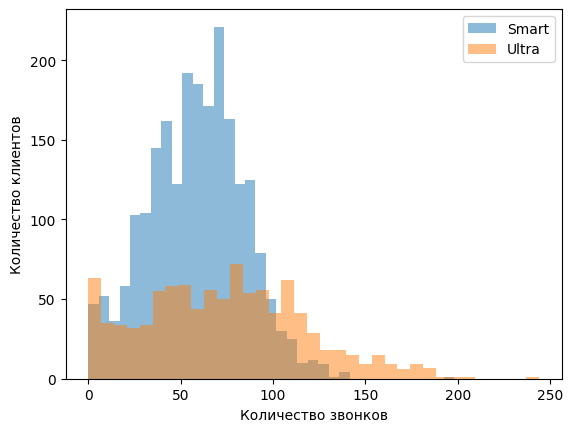

In [42]:
# построим график отношения количества клиентов и количество звонок
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество звонков')
plt.ylabel('Количество клиентов')
plt.show()

Изучим распределение средней продолжительности звонков по видам тарифов и месяцам

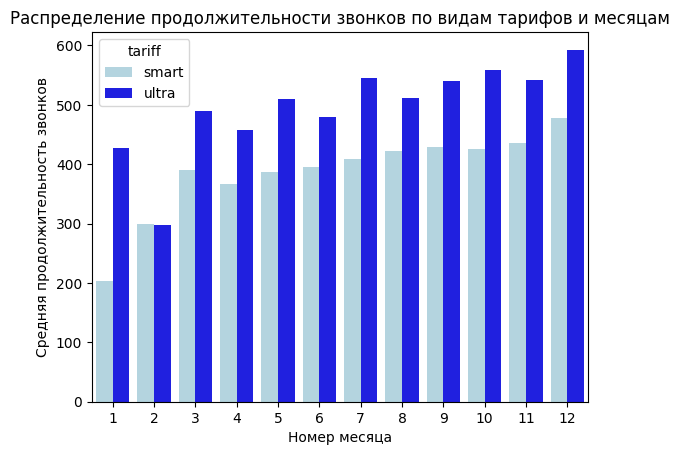

In [43]:
# строим график
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение продолжительности звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Средняя продолжительность звонков');

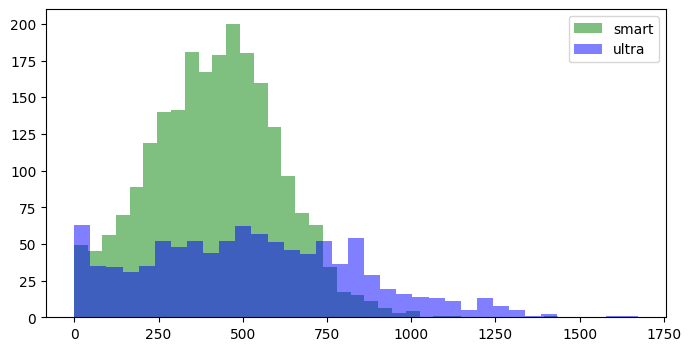

In [44]:
# строим график
plt.figure(figsize=(8,4))

plt.hist(user_behavior[user_behavior['tariff'] =='smart']['minutes'],
         bins=35, alpha=0.5, color='green', label='smart')

plt.hist(user_behavior[user_behavior['tariff'] =='ultra']['minutes'],
         bins=35, alpha=0.5, color='blue', label='ultra')

plt.legend(loc='upper right')
plt.show()

Средняя длительность разговоров у абонентов тарифа `ultra` больше, чем у абонентов тарифа `smart`. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа `smart` равномерный в течение года. Пользователи тарифа `ultra` не проявляют подобной линейной стабильности. Стоит отметить, что в феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.

Посмотрим распределение среднего количества сообщений по видам тарифов и месяцам.

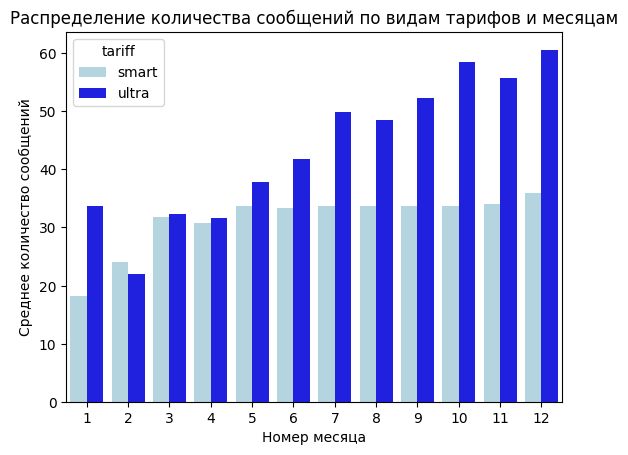

In [45]:
# строим график
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества сообщений по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество сообщений');

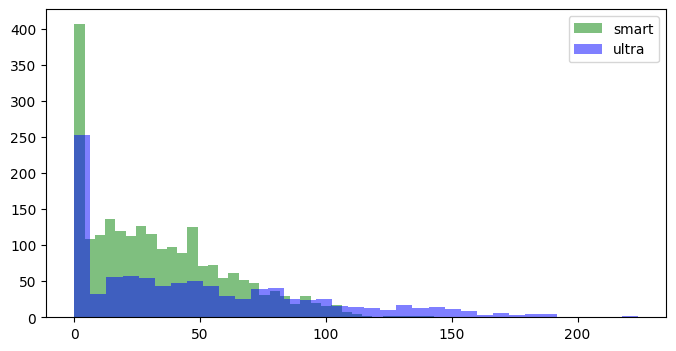

In [46]:
# строим график
plt.figure(figsize=(8,4))

plt.hist(user_behavior[user_behavior['tariff'] =='smart']['messages'],
         bins=35, alpha=0.5, color='green', label='smart')

plt.hist(user_behavior[user_behavior['tariff'] =='ultra']['messages'],
         bins=35, alpha=0.5, color='blue', label='ultra')

plt.legend(loc='upper right')
plt.show()

В среднем пользователи тарифа `ultra` отправляют больше сообщений — почти на 20 сообщений больше, чем пользователи тарифа `smart`. Количество сообщений в течение года на обоих тарифах растёт. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа `ultra` также проявляют нелинейную положительную динамику.

Построим распределение количества потраченного трафика в Мб по видам тарифов и месяцам.

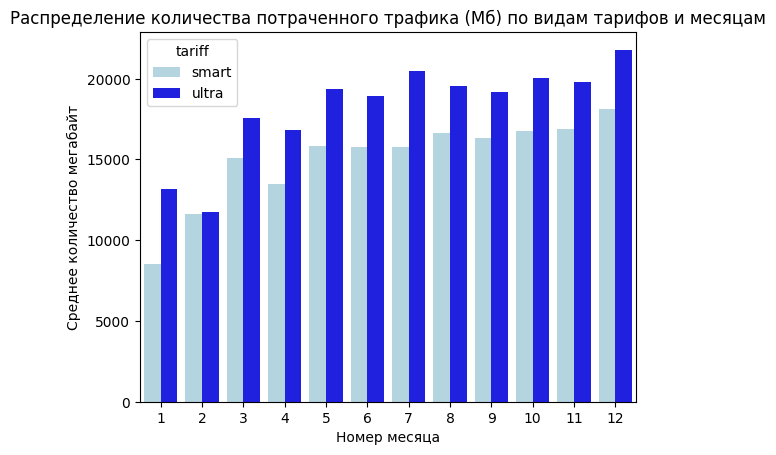

In [47]:
# строим график
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue='tariff',
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество мегабайт');

Сравнение потраченных мегабайт среди пользователей тарифов Smart и Ultra

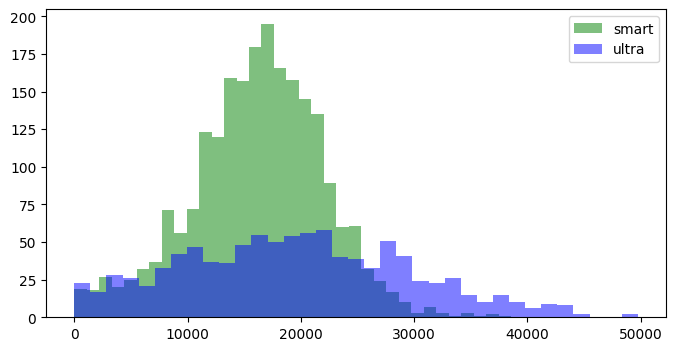

In [48]:
# строим график
plt.figure(figsize=(8,4))

plt.hist(user_behavior[user_behavior['tariff'] =='smart']['mb_used'],
         bins=35, alpha=0.5, color='green', label='smart')

plt.hist(user_behavior[user_behavior['tariff'] =='ultra']['mb_used'],
         bins=35, alpha=0.5, color='blue', label='ultra')

plt.legend(loc='upper right')
plt.show()

Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа `smart` тратят 15–17 Гб, а абоненты тарифного плана `ultra` — 19–21 ГБ.

## Шаг 4. Проверка гипотез

Теперь выполним проверку гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.


- H_0: Выручка (total_cost) пользователей "Ультра" = выручка (total_cost) пользователей "Смарт"`
- H_a: Выручка (total_cost) пользователей "Ультра" ≠ выручка (total_cost) пользователей "Смарт"`

alpha = 0.05


In [49]:
ultra = dataultra = user_behavior.query("tariff == 'ultra'")
smart = user_behavior.query("tariff == 'smart'")

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(ultra['total_cost'], smart['total_cost'], equal_var=False)

# alpha = зададим значение уровня значимости
alpha = .05

# вывод значения p-value на экран
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")# условный оператор с выводом строки с ответом

4.2606313931076085e-250
Отвергаем нулевую гипотезу


Далее выполним проверку гипотезы: средняя выручка с пользователей из Москвы отличается от выручки c пользователей других регионов;

- H_0: Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы`
- H_1: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы`

alpha = 0.05

In [50]:
city_moscow = dataultra = user_behavior.query("city == 'Москва'")
city_other = user_behavior.query("city != 'Москва'")

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(city_moscow['total_cost'], city_other['total_cost'], equal_var=False)

# alpha = зададим значение уровня значимости
alpha = .05

# вывод значения p-value на экран
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")# условный оператор с выводом строки с ответом

0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


## Шаг 5. Общий вывод

В данном проекте мы выясняли какой тариф оператора сотовой связи лучше и перспективнее.

В первую очередь мы изучили данные предоставленных датасетов. По полученным данным мы наблюдали, что все значения в датасетах заполнены, однако, в таблице `users` имеется колонка `churn_date` (дата прекращения пользования тарифом), в которой очень мало значений - это нам говорит о том, что еще большое количество клиентов не завершили договор с оператором сотовой связи. Также мы наблюдали, что имеются неправильные типы, которые мы привели к корректному, что позволило далее провести корректный анализ данных.

После мы подготовили данные для последующего анализа:
- В датасетах `users`, `calls`, `messages`, `sessions` привели данные к правильным типам;
- В датасете `sessions` удалили колонку `Unnamed: 0`;
- В датасетах `calls`, `messages`, `sessions` добавили колонку `month` с номером месяца;
- Подготовители дополнительные данные, а именно посчитали количество:
  - сделанных звонков разговора для каждого пользователя по месяцам - датасет `calls_per_month`;
  - израсходованных минут разговора для каждого пользователя по месяцам - датасет `minutes_per_month`;
  - отправленных сообщений по месяцам для каждого пользователя - `messages_per_month`;
  - потраченных мегабайт по месяцам для каждого пользователя - `sessions_per_month`.

При выполнении анализа данных мы выяснили:
- Наибольшее количество звонков наблюдается в декабре, это может быть обусловлено предстоящим праздником Новый Год - оформление заказов на подарки, поздравления, заказ праздничных банкетов и так далее.
- Наблюдается, что тарифом `ultra` пользуются больше чем `smart`.
- Средняя длительность разговоров у абонентов тарифа `ultra` больше, чем у абонентов тарифа `smart`. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа `smart` равномерный в течение года. Пользователи тарифа `ultra` не проявляют подобной линейной стабильности. Стоит отметить, что в феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.
- В среднем пользователи тарифа `ultra` отправляют больше сообщений — почти на 20 сообщений больше, чем пользователи тарифа `smart`. Количество сообщений в течение года на обоих тарифах растёт. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа `ultra` также проявляют нелинейную положительную динамику.
- Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа `smart` тратят 15–17 Гб, а абоненты тарифного плана `ultra` — 19–21 ГБ.

Далее мы проверили гипотезы, в результате данной проверки мы можем смело сказать, что выручка пользователей тарифа `ultra` не равна выручке полльзователей тарифа `smart`, а также что выручки пользователей Москвы и других городов равны.


***
По итогу мы можем сделать основной вывод, что пользователи тарифа `smart` наиболее предпочитетельнее оператору связи, так как у них чаще всего наблюдается перерасход по тарифу, в результате чего выполняется доплата за тариф, а также по тарифу `smart` более привлекательные условия по оплате, чем у тарифа `ultra`.
***